# Load and visualize models

In [1]:
# HIDE CODE


import os, sys
sys.path.insert(0, './')
from utils.plotting import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline
set_style()

In [2]:
device_idx = 0
device = f'cuda:{device_idx}'

## Load models

In [3]:
from base.utils_model import load_model_lite

root = 'Dropbox/git/IterativeVAE'  # base directory for the project (update to match yours)
root = add_home(f"{root}/checkpoints/")  # contains model checkpoints
print(os.listdir(root))

[
    'gaussian_<grad|lin>_vH16-wht_t-16_b-8_k-[512]',
    'poisson_<grad|lin>_vH16-wht_t-16_b-24_k-[512]',
    'gaussian+relu_<grad|lin>_vH16-wht_t-16_b-8_k-[512]'
]

In [4]:
models2load = {
    'poisson': 'poisson_<grad|lin>_vH16-wht_t-16_b-24_k-[512]',
    'gaussian': 'gaussian_<grad|lin>_vH16-wht_t-16_b-8_k-[512]',
    'gaussian+relu': 'gaussian+relu_<grad|lin>_vH16-wht_t-16_b-8_k-[512]',
}

In [5]:
trainers = {}
for model_name, f in models2load.items():
    # load trainer object (with model: tr.model)
    tr = load_model_lite(pjoin(root, f), device=device, verbose=True)[0]
    trainers[model_name] = tr

# params: 132.4 K

# params: 132.9 K

# params: 133.4 K

In [6]:
for name, tr in trainers.items():
    print(name, tr.model)

poisson IPVAE(
  (layer): PoissonLayer(input_dim=256, latent_dim=512, temperature=0.01, beta_inner=1, eps=1)
)

gaussian IGVAE(
  (layer): GaussianLayer(input_dim=256, latent_dim=512, temperature=1, beta_inner=1, eps=1)
)

gaussian+relu IGVAE(
  (layer): GaussianReluLayer(input_dim=256, latent_dim=512, temperature=1, beta_inner=1, eps=1)
)

## Plot dictionary $\Phi$

poisson

100%|███████████████████████████████████| 3/3 [00:11<00:00,  3.79s/it]


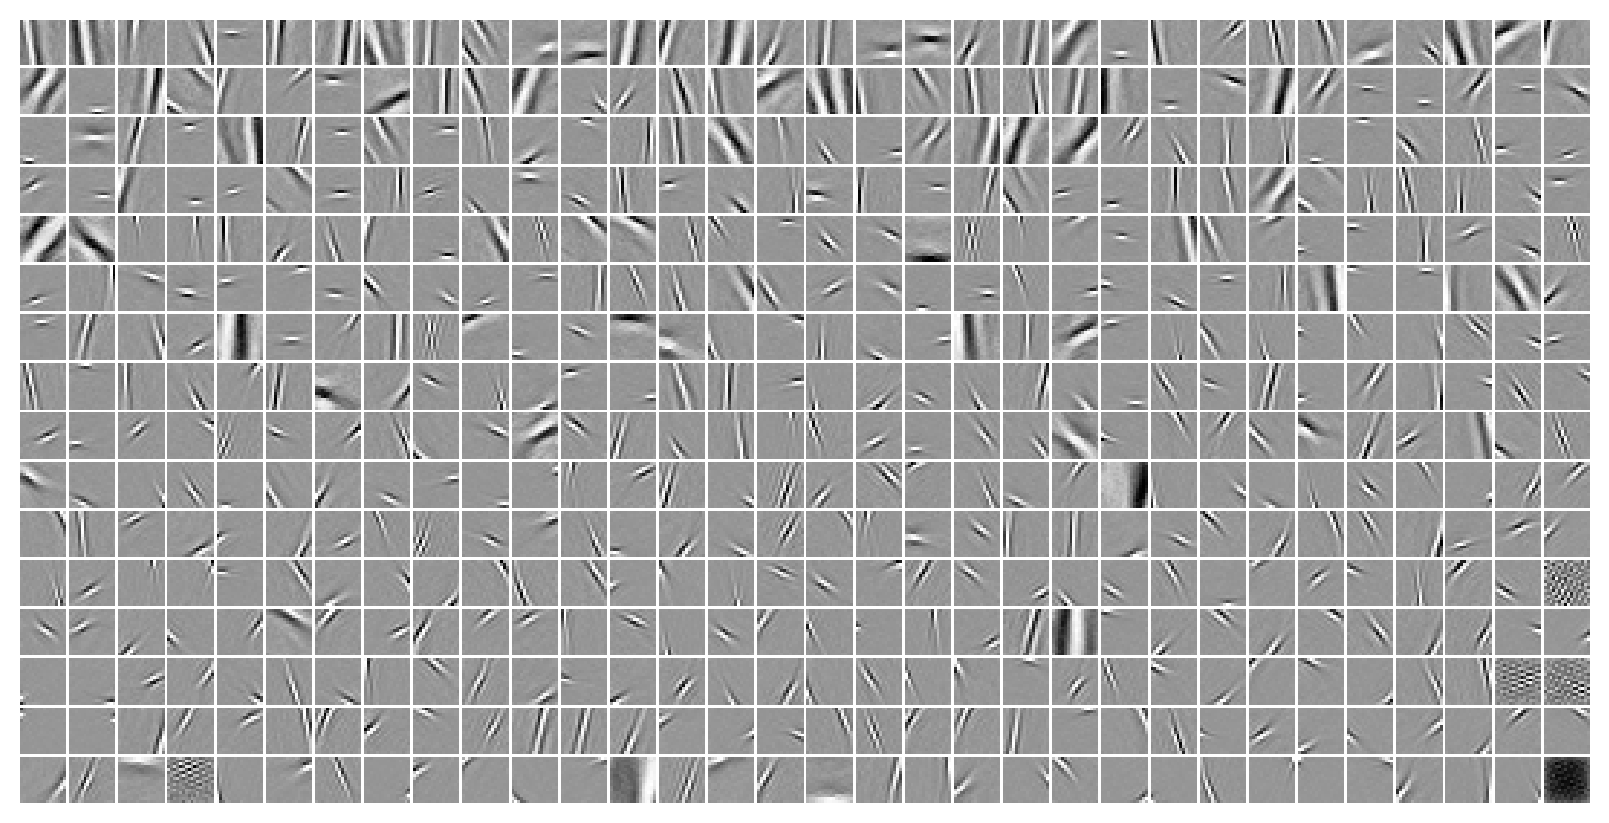

gaussian

100%|███████████████████████████████████| 3/3 [00:09<00:00,  3.33s/it]


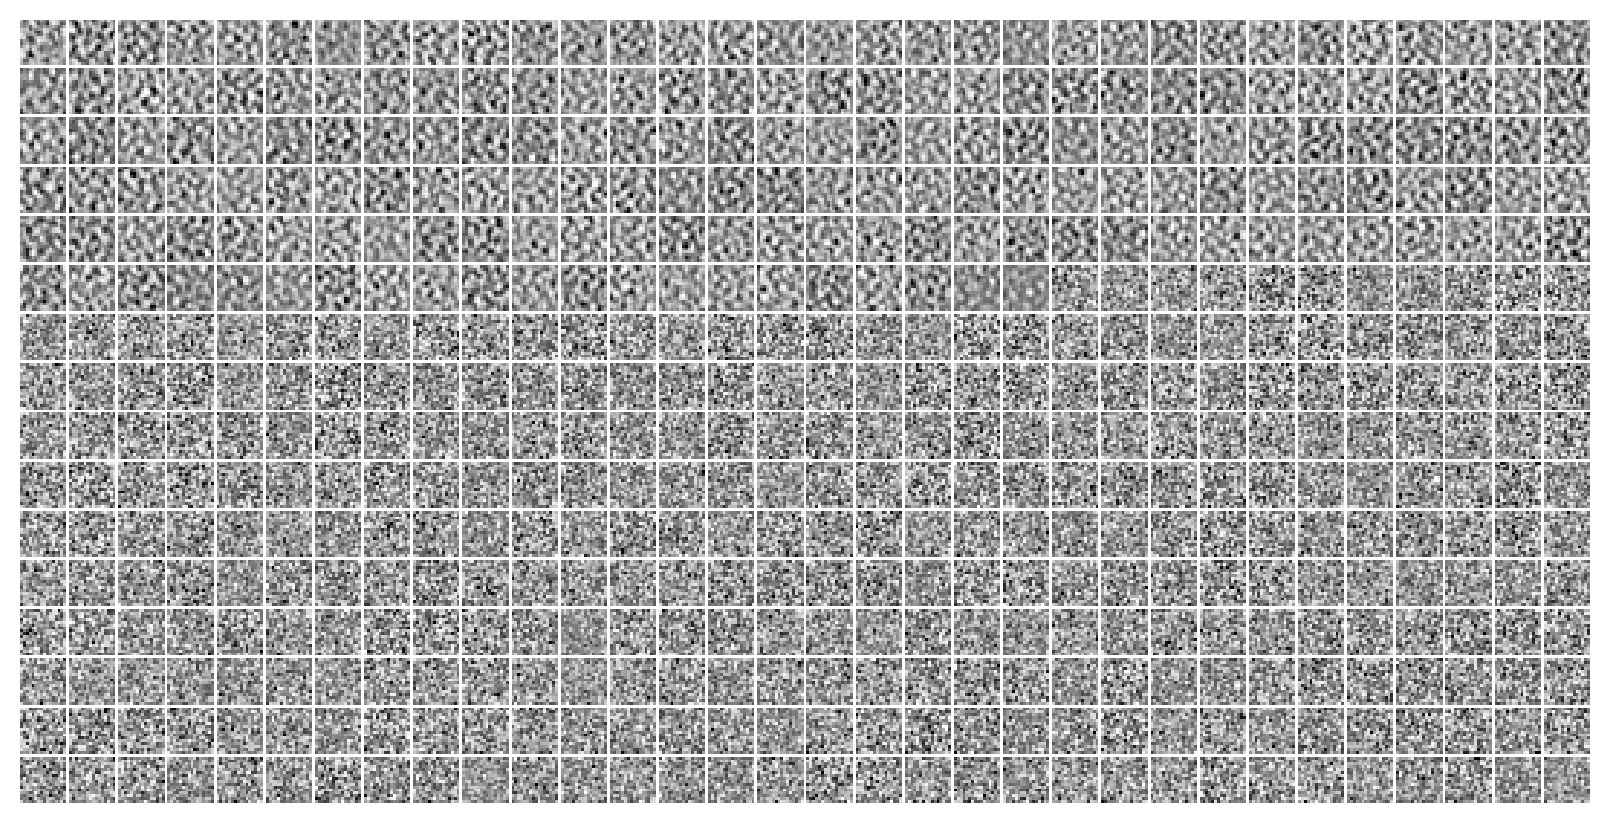

gaussian+relu

100%|███████████████████████████████████| 3/3 [00:10<00:00,  3.40s/it]


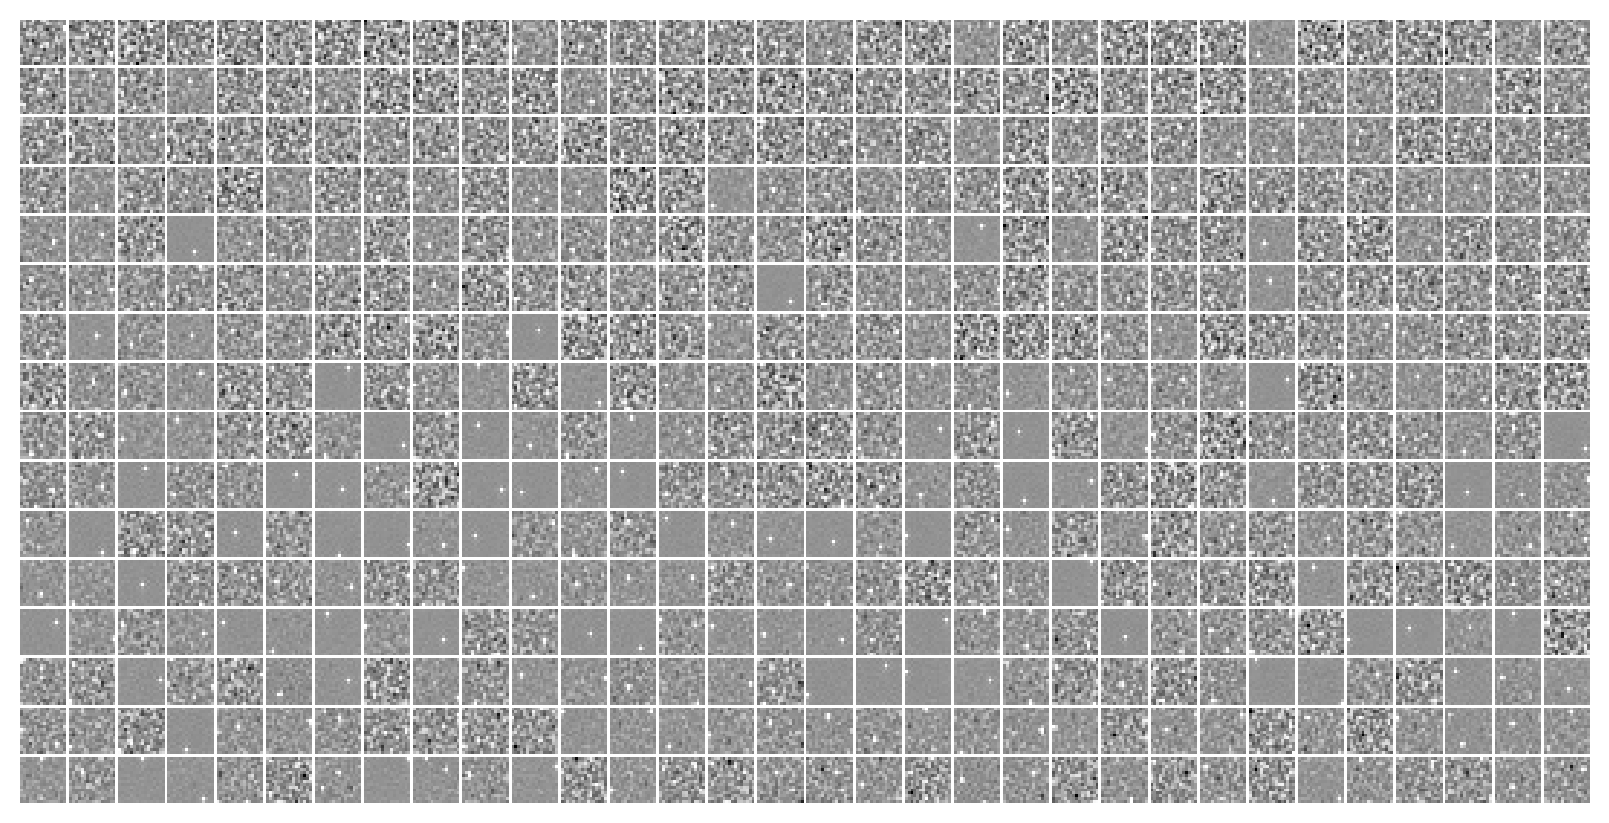

CPU times: user 30.4 s, sys: 1.65 s, total: 32.1 s
Wall time: 32 s


In [7]:
%%time

for name, tr in trainers.items():
    print(name)
    # extract features (we need posterior membrane potentials to order neurons)
    output = tr.xtract_ftr('vld', data_batch_sz=9_000, n_data_batches=-1)
    # final membrane potentials averaged over the entire test set
    u_final = output['state'][:, -1].mean(0)
    # order neurons
    order = np.argsort(u_final)
    # plot
    fig, _ = tr.model.show(order=order, method='abs-max')